In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay


import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
pd.options.mode.chained_assignment = None  # default='warn'

Using a variable for the filepath to ease location and change if needed

In [129]:
filepath="C:/Users/itrem/OneDrive/Dev/dsti/S23/Python Project/Goodreads-books-rating/data/clean_books_automated.csv"

Importing CSV with warning for incorrect data import to review whether it will have an impact on the data set information. Only 4 lines were skipped, which given the dataset volume are deprecable

In [130]:
dataset = pd.read_csv(filepath, on_bad_lines='warn')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Reviwing basic stats of the dataset:

In [131]:
# Basic stats
print("# Number of rows : {}".format(dataset.shape[0]))
print()

print("# Display of dataset: ")
print("---------------------")
display(dataset.head())
print()

print("# Basics statistics: ")
print("--------------------")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("# Percentage of missing values: ")
print("-------------------------------")
display(100*dataset.isnull().sum()/dataset.shape[0])

print("# Feature valUe types:")
print("----------------------")
display(dataset.dtypes)

# Number of rows : 11127

# Display of dataset: 
---------------------


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic



# Basics statistics: 
--------------------


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11127.000000,11127,11127,11127.000000,11127,1.112700e+04,11127,11127.000000,1.112700e+04,11127.000000,11127,11127
unique,NaN,10352,6643,NaN,11127,NaN,27,NaN,NaN,NaN,3679,2293
top,NaN,The Brothers Karamazov,Stephen King,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8911,NaN,NaN,NaN,56,318
mean,21310.938887,NaN,NaN,3.933631,NaN,9.759888e+12,NaN,336.376921,1.793641e+04,541.854498,NaN,NaN
std,13093.358023,NaN,NaN,0.352445,NaN,4.428964e+11,NaN,241.127305,1.124794e+05,2576.176608,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10287.000000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780586e+12,NaN,299.000000,7.450000e+02,46.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.135000,NaN,9.780873e+12,NaN,416.000000,4.993500e+03,237.500000,NaN,NaN



# Percentage of missing values: 
-------------------------------


bookID                0.0
title                 0.0
authors               0.0
average_rating        0.0
isbn                  0.0
isbn13                0.0
language_code         0.0
  num_pages           0.0
ratings_count         0.0
text_reviews_count    0.0
publication_date      0.0
publisher             0.0
dtype: float64

# Feature valUe types:
----------------------


bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

After reviewing of the stats we notice a few things:
- There are a few columns that do not provide any valuable information that could be used in a model: bookID (it's an index), isbn (book internal reference) and isbn13 (book internal reference). These can be removed
- ratings_count and text_reviews_count seem irrelevant as we try to predict a rating for a book not listed, therefore without these values. Also publication_date will likely imply a date further to those recorded so far
- num_pages has a weird space on front

In [132]:
# Drop useless columns
useless_cols = ['bookID', 'isbn', 'isbn13', 'ratings_count','text_reviews_count', 'publication_date']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis

print("Renaming columns...")
dataset.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

print("...Done.")
display(dataset.head())
display(dataset.dtypes)


Dropping useless columns...
Renaming columns...
...Done.


,title,authors,average_rating,language_code,num_pages,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,Scholastic


title              object
authors            object
average_rating    float64
language_code      object
num_pages           int64
publisher          object
dtype: object

After this, we can continue with two data engineering splits:
- We noticed that books that are from a series are within parenthesis. We can extract this information to a new column and remove the series number
- Splitting authors into several columns could be cumbersome and provide little information, however knowing whether the book was single written or co-authored could have a significant meaning, so we can create a column that will contain the first author only, who is generally the main author
- Language has different values for english (en-us, en-gb, en-ca) which seems redundant. Unifiying to "eng"

In [133]:
dataset.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [134]:
# Creating a new column for the in_series data
dataset.insert(1,"is_series", "no")

# Creating a new column for the main_author data
dataset.insert(3,"main_author", "no")
    

In [135]:
# Stripping the book series data from the title to the newly created column
for i in range(len(dataset.title)) :
    if "#" in str(dataset.title[i]): # All series have a volume number with # before. Flagging those help strip the series name
        dataset.is_series[i] = dataset.title[i][dataset.title[i].find("(")+1:dataset.title[i].find(")")].strip()[:dataset.title[i][dataset.title[i].find("(")+1:dataset.title[i].find(")")].find(" #")]
        dataset.title[i] = dataset.title[i][:dataset.title[i].find("(")-1] # to remove the series name and number from the book title
    
# Copying the main author name to the newly created column
for i in range(len(dataset.authors)):
    if "/" in str(dataset.authors[i]):
        dataset.main_author[i] = dataset.authors[i][:dataset.authors[i].find("/")]
    
    else:
       dataset.main_author[i] = dataset.authors[i]

# Rounding the average_rating values

for i in range(len(dataset.average_rating)):
    dataset.average_rating[i] = round(dataset.average_rating[i])

dataset.average_rating = dataset.average_rating.astype('int')

# Lower casing all text

for l in dataset.columns.tolist():
    if dataset[l].dtype == 'O':
        for i in range(len(dataset[l])):
            dataset[l][i] = dataset[l][i].lower()

# Unifying all english variants to english "eng"

for i in range(len(dataset.language_code)):
    if "en-" in str(dataset.language_code[i]):
        dataset.language_code[i] = "eng"
        

print(dataset.language_code.unique())

dataset.head()


['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


,title,is_series,authors,main_author,average_rating,language_code,num_pages,publisher
0,harry potter and the half-blood prince,harry potter,j.k. rowling/mary grandpré,j.k. rowling,5,eng,652,scholastic inc.
1,harry potter and the order of the phoenix,harry potter,j.k. rowling/mary grandpré,j.k. rowling,4,eng,870,scholastic inc.
2,harry potter and the chamber of secrets,harry potter,j.k. rowling,j.k. rowling,4,eng,352,scholastic
3,harry potter and the prisoner of azkaban,harry potter,j.k. rowling/mary grandpré,j.k. rowling,5,eng,435,scholastic inc.
4,harry potter boxed set books 1-5,harry potter,j.k. rowling/mary grandpré,j.k. rowling,5,eng,2690,scholastic


After the additional cleaning needed for this model to work, we start with the preprocessing and prediction based on the cleaned data

In [136]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "average_rating"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    5
1    4
2    4
3    5
4    5
Name: average_rating, dtype: int32

X :
                                       title      is_series  \
0     harry potter and the half-blood prince  harry potter    
1  harry potter and the order of the phoenix  harry potter    
2    harry potter and the chamber of secrets  harry potter    
3   harry potter and the prisoner of azkaban  harry potter    
4          harry potter boxed set  books 1-5  harry potter    

                      authors   main_author language_code  num_pages  \
0  j.k. rowling/mary grandpré  j.k. rowling           eng        652   
1  j.k. rowling/mary grandpré  j.k. rowling           eng        870   
2                j.k. rowling  j.k. rowling           eng        352   
3  j.k. rowling/mary grandpré  j.k. rowling           eng        435   
4  j.k. rowling/mary grandpré  j.k. rowling           eng       2690   

         publisher  
0  scholastic inc.  
1  scholastic inc.  


In [137]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['num_pages']
Found categorical features  ['title', 'is_series', 'authors', 'main_author', 'language_code', 'publisher']


In [138]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=30, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [139]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean') # missing values will be replaced by columns' mean, although we know there are none

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first', handle_unknown = 'infrequent_if_exist') # no missing values in categorical data, so we only need the OHE


# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [140]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
                                                  title         is_series  \
526   essentials of american and texas government: c...                no   
1618                                     cradle and all                no   
4706                          the house that jack built                no   
1174                               the fall of hyperion  hyperion cantos    
1259         how much is that guinea pig in the window?                no   

                              authors       main_author language_code  \
526   karen  o'connor/larry j. sabato   karen  o'connor           eng   
1618                  james patterson   james patterson           eng   
4706                 graham masterton  graham masterton           eng   
1174                      dan simmons       dan simmons           eng   
1259  joanne rocklin/meredith johnson    joanne rocklin           eng   

      num_pages                 publisher  
526         

c:\Users\itrem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In order to find out the best parameters for our Decission Tree, we perform a grid search that will give us the optimal values

In [141]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

c:\Users\itrem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Grid search...
...Done.
Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best validation accuracy :  0.9195171026156942


In [142]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[4 4 4 ... 4 4 4]

Probabilities on training set...
...Done.
[[5.17598344e-04 0.00000000e+00 1.03519669e-03 2.63975155e-02
  9.55486542e-01 1.65631470e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 ...
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]]



In [143]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[4 4 4 ... 4 4 4]

Probabilities on test set...
...Done.
[[5.17598344e-04 0.00000000e+00 1.03519669e-03 2.63975155e-02
  9.55486542e-01 1.65631470e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 ...
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]
 [5.17598344e-04 0.00000000e+00 1.03519669e-03 2.63975155e-02
  9.55486542e-01 1.65631470e-02]
 [2.92344235e-03 1.82715147e-04 9.13575735e-04 7.43650649e-02
  9.10104148e-01 1.15110543e-02]]



In [144]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average='micro'))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average='micro'))
print()

accuracy on training set :  0.922468142186452
accuracy on test set :  0.9188453159041394

f1-score on training set :  0.922468142186452
f1-score on test set :  0.9188453159041394



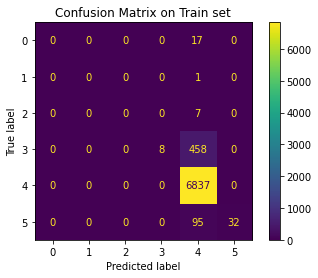

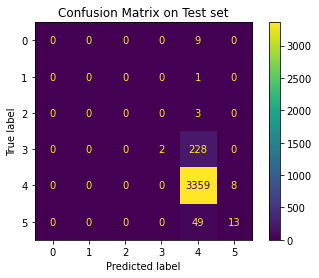

In [145]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()